<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          300 non-null    int64  
 1   Gender               300 non-null    object 
 2   Age                  300 non-null    int64  
 3   Annual_Income(₹)     300 non-null    int64  
 4   Income_Category      300 non-null    object 
 5   Purchase_Amount(₹)   300 non-null    float64
 6   Number_of_Purchases  300 non-null    int64  
 7   Membership_Years     300 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 18.9+ KB

 Mean age :  37.94

 Mean annual income  :  498454.57666666666

 Standard Total Spending :  217248.92690981217

 Mean total spending :  264261.66256666667

 Average spending distribution by gender  Gender
Female    266263.773467
Male      262259.551667
Name: Total_Spending, dtype: float64

 Average income distribution by gender  G

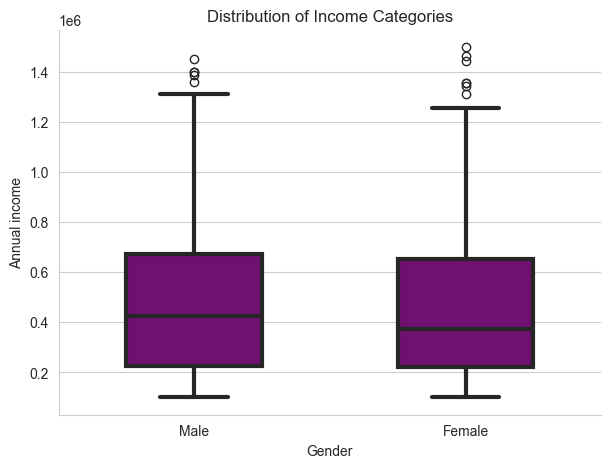

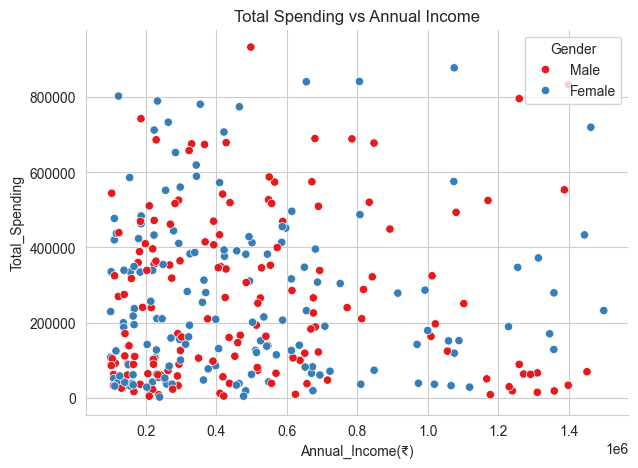

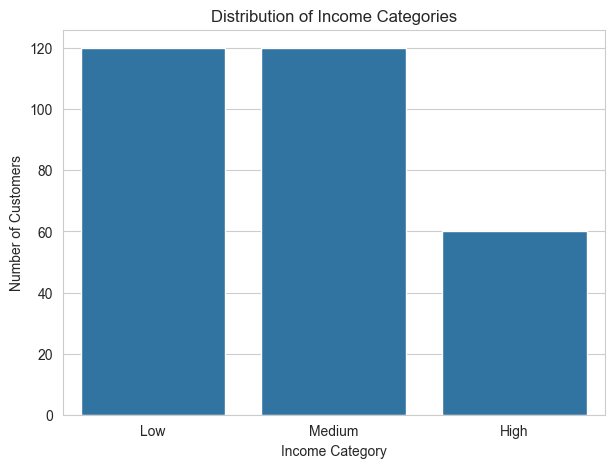

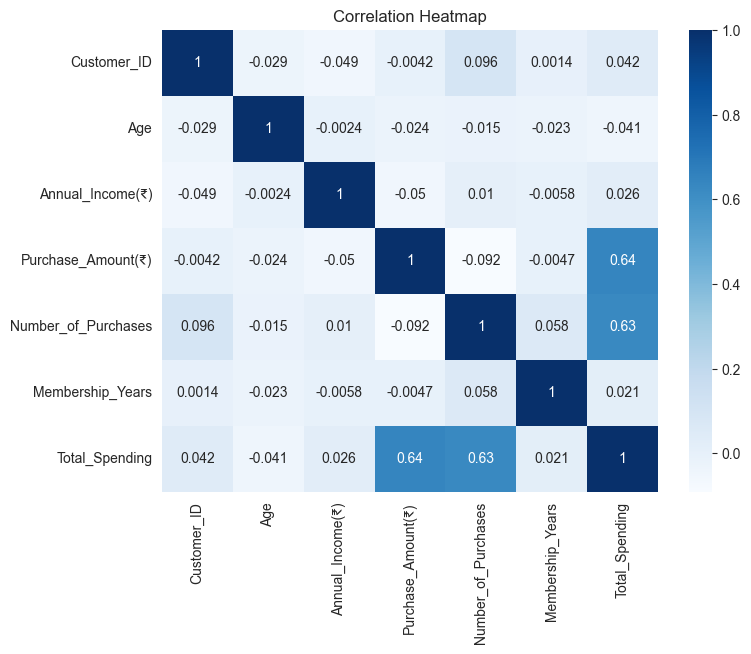

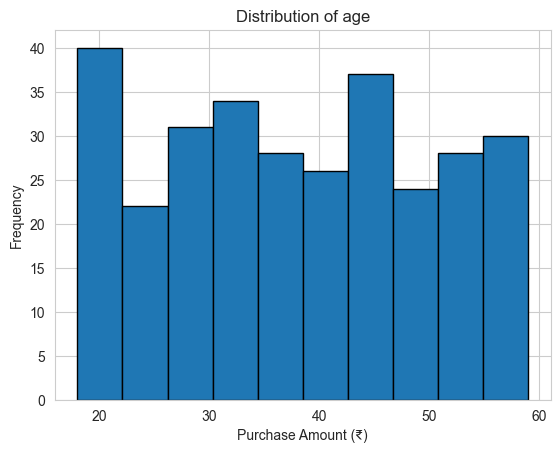

C:\Users\aadis\AppData\Local\Temp\ipykernel_19228\1787036783.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Group", y="Total_Spending", palette="mako")



Top 5 Biggest Spenders:
      Customer_ID  Gender  Age  Annual_Income(₹) Income_Category  \
219          220    Male   22            573110          Medium   
252          253  Female   58            806082            High   
290          291  Female   27            681246          Medium   
93            94    Male   28            405879          Medium   
125          126    Male   22            679990          Medium   
286          287    Male   32            498287          Medium   
211          212    Male   46            229981             Low   
78            79    Male   28            427949          Medium   
46            47  Female   42           1074706            High   
121          122  Female   30            807513            High   

     Purchase_Amount(₹)  Number_of_Purchases  Membership_Years  \
219            49967.80                    8               7.9   
252            49519.00                   17               4.4   
290            49461.41               

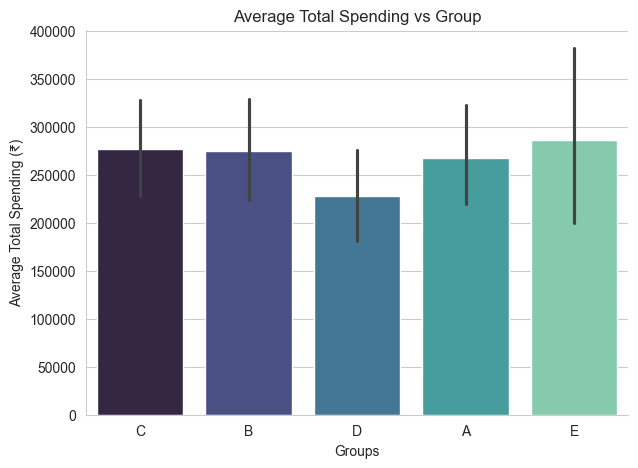

In [13]:
#Customer Purchase Behavior Analysis Using Python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
df = pd.read_csv(r"C:\Users\aadis\Downloads\Customers_Purchase_300_balanced.csv")

#Check first few rows
df.head()

#Basic dataset info
df.info()

#Check missing values 
df.isnull().sum()

# New coloumn
df["Total_Spending"] = df["Purchase_Amount(₹)"]*df["Number_of_Purchases"]

#Basic statistics
Mean_Age = df["Age"].mean()
print("\n Mean age : ", Mean_Age )
Mean_Annual_Income = df["Annual_Income(₹)"].mean()
print("\n Mean annual income  : ", Mean_Annual_Income )
Std_Total_Spending = df["Total_Spending"].std()
print("\n Standard Total Spending : ", Std_Total_Spending )
Mean_Total_Spending = df["Total_Spending"].mean()
print("\n Mean total spending : ",Mean_Total_Spending)

#Age groups 
def Age_groups(Age):
    if 18 <= Age <= 25:
        return "A"
    elif 26 <= Age <= 35:
        return "B"
    elif 36 <= Age <= 45:
        return "C"
    elif 46 <= Age <= 55:
        return "D"
    else:
        return "E"

#Add age group        
df["Group"] = df["Age"].apply(Age_groups)

#Group by Gender And Aveage spending
Average_Spending = df.groupby("Gender")["Total_Spending"].mean()
print("\n Average spending distribution by gender " , Average_Spending )
#Group by Gender And Aveage income
Average_Income = df.groupby("Gender")["Annual_Income(₹)"].mean()
print("\n Average income distribution by gender " , Average_Income )

sns.set_style("whitegrid")

#Boxplot -> Annual Income by Gender
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x="Gender",y="Annual_Income(₹)",width=0.5,linewidth=3,color="purple")
sns.despine()
plt.title("Distribution of Income Categories")
plt.xlabel("Gender")
plt.ylabel("Annual income")
plt.show()

#Scatter Plot -> Total spending  vs Income
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x="Annual_Income(₹)",y="Total_Spending",marker="o",hue="Gender",palette="Set1")   
sns.despine()
plt.title("Total Spending vs Annual Income")
plt.show()

#Count Plot -> Count of each Income_Category
plt.figure(figsize=(7,5))
sns.countplot(data=df,x="Income_Category" )
plt.title("Distribution of Income Categories")
plt.xlabel("Income Category")
plt.ylabel("Number of Customers")
plt.show()

#Heatmap -> Correlation between numeric columns
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

#Histogram -> Age Distribution
plt.hist(df["Age"],bins=10,edgecolor="Black")
plt.title("Distribution of age")
plt.xlabel("Purchase Amount (₹)")
plt.ylabel("Frequency")
plt.show()

# Barplot -> Average Total Spending by Age Group
plt.figure(figsize=(7,5))
sns.barplot(data=df, x="Group", y="Total_Spending", palette="mako")
sns.despine()
plt.title("Average Total Spending vs Group")
plt.xlabel("Groups")
plt.ylabel("Average Total Spending (₹)")


#Top 10 spenders 
Top_10 = df.sort_values("Purchase_Amount(₹)", ascending=False).head(10)
print("\nTop 5 Biggest Spenders:\n", Top_10)